# 前○時間平均の降雨データをmatplotlibのbarで正確に書く

観測された降雨データの多くは前○時間平均で整理されています。

前○時間平均とは、例えば、1時間間隔の観測データで1/1 12:00の観測値が、1/1 11:00～12:00の平均値を示すことです。

参考：[降水量とは？降水量の測り方や目安 ｜ お天気.com](https://hp.otenki.com/375/)

ポイントは2点
 - alignを"edge"とする。
     * barの起点は標準ではcenterのためedgeにする。
 - widthを-サンプリング時間/24とする。
     * 時間軸の場合、width:1が1日となる。そのため、サンプリング時間（hr）/24とする。
     * widthは起点からx軸の+方向に設定するため、前平均を考慮すると-標記になる。
 
サンプルとして、30分間隔の雨量データのグラフを書いてみる。

In [1]:
import pandas as pd
dfrain = pd.read_csv('rain.csv', index_col='date', parse_dates=True)
dfrain

,rainfall
date,
2019-10-11 09:00:00,0.000000
2019-10-11 09:30:00,0.000000
2019-10-11 10:00:00,0.000000
2019-10-11 10:30:00,0.132632
2019-10-11 11:00:00,0.090526
...,...
2019-10-14 06:30:00,0.202105
2019-10-14 07:00:00,0.235789
2019-10-14 07:30:00,0.231579


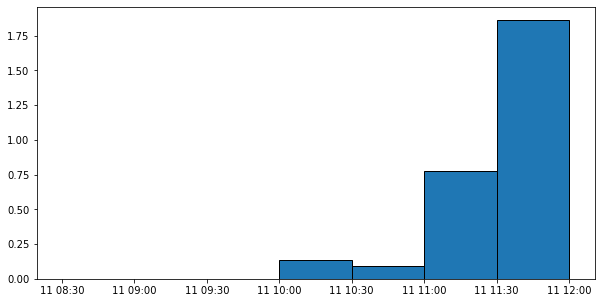

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5), facecolor='white')
ax.bar(dfrain.index[:7], dfrain['rainfall'].values[:7].flatten(),  edgecolor="k", width=-0.5/24,  align="edge")
ax.xaxis_date() #自動で型を判断するため無くても良いが、念のため記述。
plt.show()

ついでに流出解析っぽい絵(y軸を2軸、降雨の軸を反転)も書いてみる。

ポイントは、

 - x軸を共有してy軸を2つ設定する。
 - 降雨軸のylimを（最大表示範囲、最小表示範囲）に設定する。
 
です。

In [3]:
dfQ = pd.read_csv('宮ヶ瀬ダムobs.csv', index_col='date', parse_dates=True)
dfQ= dfQ['2019/10/11':'2019/10/14']
dfQ

,流域平均雨量[mm/h],貯水量[×10^3 m3],流入量[m3/s],放流量[m3/s],貯水率[%]
date,,,,,
2019-10-11 00:00:00,NaN,138326.0,2.41,0.00,100.0
2019-10-11 01:00:00,NaN,138367.0,5.04,0.00,100.0
2019-10-11 02:00:00,NaN,138408.0,8.19,18.86,100.0
2019-10-11 03:00:00,NaN,138367.0,8.19,18.96,100.0
2019-10-11 04:00:00,NaN,138326.0,5.19,19.12,100.0
...,...,...,...,...,...
2019-10-14 19:00:00,NaN,173298.0,39.80,55.52,100.0
2019-10-14 20:00:00,NaN,173255.0,38.30,55.51,100.0
2019-10-14 21:00:00,NaN,173211.0,39.80,55.56,100.0


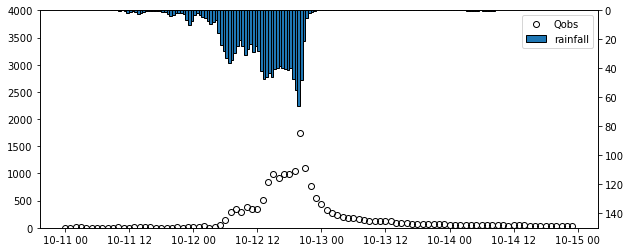

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(10,4), facecolor='white')
ax2 = ax.twinx()

ax.plot_date(dfQ.index, dfQ['流入量[m3/s]'].values, label='Qobs', linestyle='None', marker='o', color='none', markeredgecolor='black')
ax.set_ylim(0,4000)

ax2.bar(dfrain.index, dfrain['rainfall'].values, label='rainfall',  edgecolor="k", width=-0.5/24,  align="edge")
ax2.set_ylim(150,0)

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1 + h2, l1 + l2)
plt.show()